In [3]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#load datasets
daily = pd.read_csv('../data/processed/data.csv')
monthly = pd.read_csv('../data/processed/monthly_data.csv')
annual = pd.read_csv('../data/processed/annual_data.csv')

daily.tail()

,time,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,...,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d,block_height,halving_period
3833,2021-01-14,1167975.0,147.0,190694607.0,1.297242e+06,3.439686,7.262631e+11,2.111423e+11,2.060742e+13,0.000420,...,29484.008768,0.004877,190.423041,716754.326954,2.798604e+10,0.032325,0.046550,0.041402,666097.0,3.0
3834,2021-01-15,1209589.0,155.0,203959113.0,1.315865e+06,3.216919,6.828629e+11,2.122724e+11,2.060742e+13,0.000424,...,26123.685484,0.004118,151.172720,698293.382321,2.563457e+10,0.032739,0.047006,0.042350,666252.0,3.0
3835,2021-01-16,1115276.0,147.0,193973217.0,1.319546e+06,3.160028,6.729806e+11,2.129666e+11,2.060742e+13,0.000284,...,17485.508476,0.003200,115.767959,429523.096686,1.553897e+10,0.032766,0.046535,0.042143,666399.0,3.0
3836,2021-01-17,1002014.0,133.0,176557250.0,1.327498e+06,3.142090,6.710141e+11,2.135566e+11,2.060742e+13,0.000240,...,17468.332893,0.003212,115.841677,359411.915651,1.296397e+10,0.032753,0.046651,0.042182,666532.0,3.0
3837,2021-01-18,1077578.0,145.0,194495781.0,1.341350e+06,3.167897,6.808020e+11,2.149066e+11,2.060742e+13,0.000272,...,21733.955700,0.004121,150.807657,506360.124532,1.852989e+10,0.032752,0.046505,0.042159,666677.0,3.0


In [5]:
#We will drop some columns that use the price of bitcoin in USD to the calculate the data of that column,
#and other columns in the dataset that are just calculations of returns and volatility over a period of time.
columns_to_drop = ['BlkCnt', 'CapMVRVCur', 'CapMrktCurUSD', 'CapRealUSD', 'FeeMeanUSD', 'FeeMedUSD', 'FeeTotUSD',
                   'IssContUSD', 'IssTotUSD', 'NVTAdj', 'NVTAdj90', 'PriceBTC', 'ROI1yr', 'ROI30d', 'TxTfrValAdjUSD',
                   'TxTfrValMeanUSD', 'TxTfrValMedUSD', 'TxTfrValUSD', 'VtyDayRet180d', 'VtyDayRet30d', 'VtyDayRet60d']


daily = daily.drop(columns=columns_to_drop)
monthly = monthly.drop(columns=columns_to_drop)
annual = annual.drop(columns=columns_to_drop)


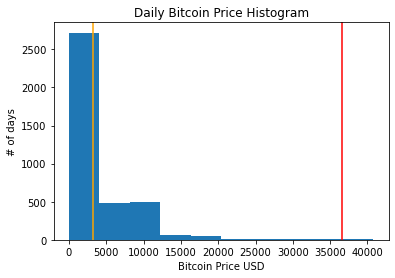

In [6]:
#The independent variable is the price of bitcoin in US$/bitcoin.
#We make a histogram of the bitcoin price to see its distribution.
btc_price_daily = daily['PriceUSD']
plt.hist(btc_price_daily, bins=10)
plt.axvline(btc_price_daily.mean(), color='orange')
plt.axvline(btc_price_daily.iloc[-1], color='red')

plt.xlabel('Bitcoin Price USD')
plt.ylabel('# of days')
plt.title('Daily Bitcoin Price Histogram')
plt.show()


#Most price observations are between $0 and $2,500
#Historical mean around $3,000 (orange line)
#However last price is $27,039 (red line)

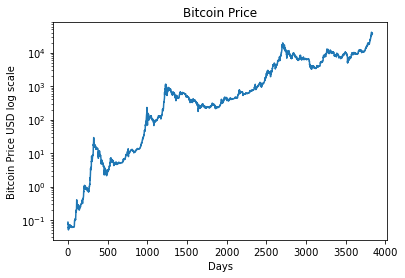

In [7]:
#Linear plot to see bitcoin's price history
plt.plot(btc_price_daily)
plt.yscale('log')
plt.xlabel('Days')
plt.ylabel('Bitcoin Price USD log scale')
plt.title('Bitcoin Price')
plt.show()



In [8]:
btc_price_daily.describe()
#The bitcoin price has varied widely from a minimum of $.05 to a maximum of $27,039.
#Historical average price is $2,999.

count     3838.000000
mean      3173.624500
std       4947.742737
min          0.050541
25%         35.048759
50%        508.648657
75%       6271.679496
max      40775.404563
Name: PriceUSD, dtype: float64

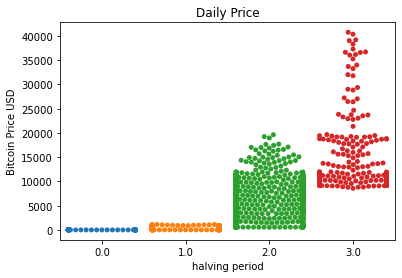

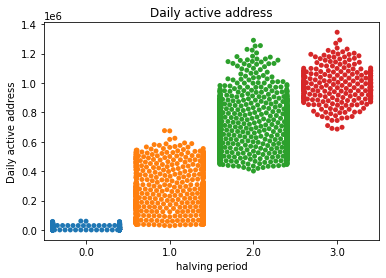

In [9]:
#swarm plot to visualize price by halving period
sns.swarmplot(x='halving_period', y='PriceUSD', data=daily)
plt.title('Daily Price')
#plt.yscale('log')
plt.xlabel('halving period')
plt.ylabel('Bitcoin Price USD')
plt.show()

sns.swarmplot(x='halving_period', y='AdrActCnt', data=daily)
plt.title('Daily active address')
#plt.yscale('log')
plt.xlabel('halving period')
plt.ylabel('Daily active address')
plt.show()


#swarm plot shows that the price has increased sharply after every halving period, when the supply growth
#of new bitcoins are cut in half according to the protocol rules. This happens every 210,000 blocks or 
#aproximately every 4 years.
#The same applies for daily active adresses, a proxy of users.

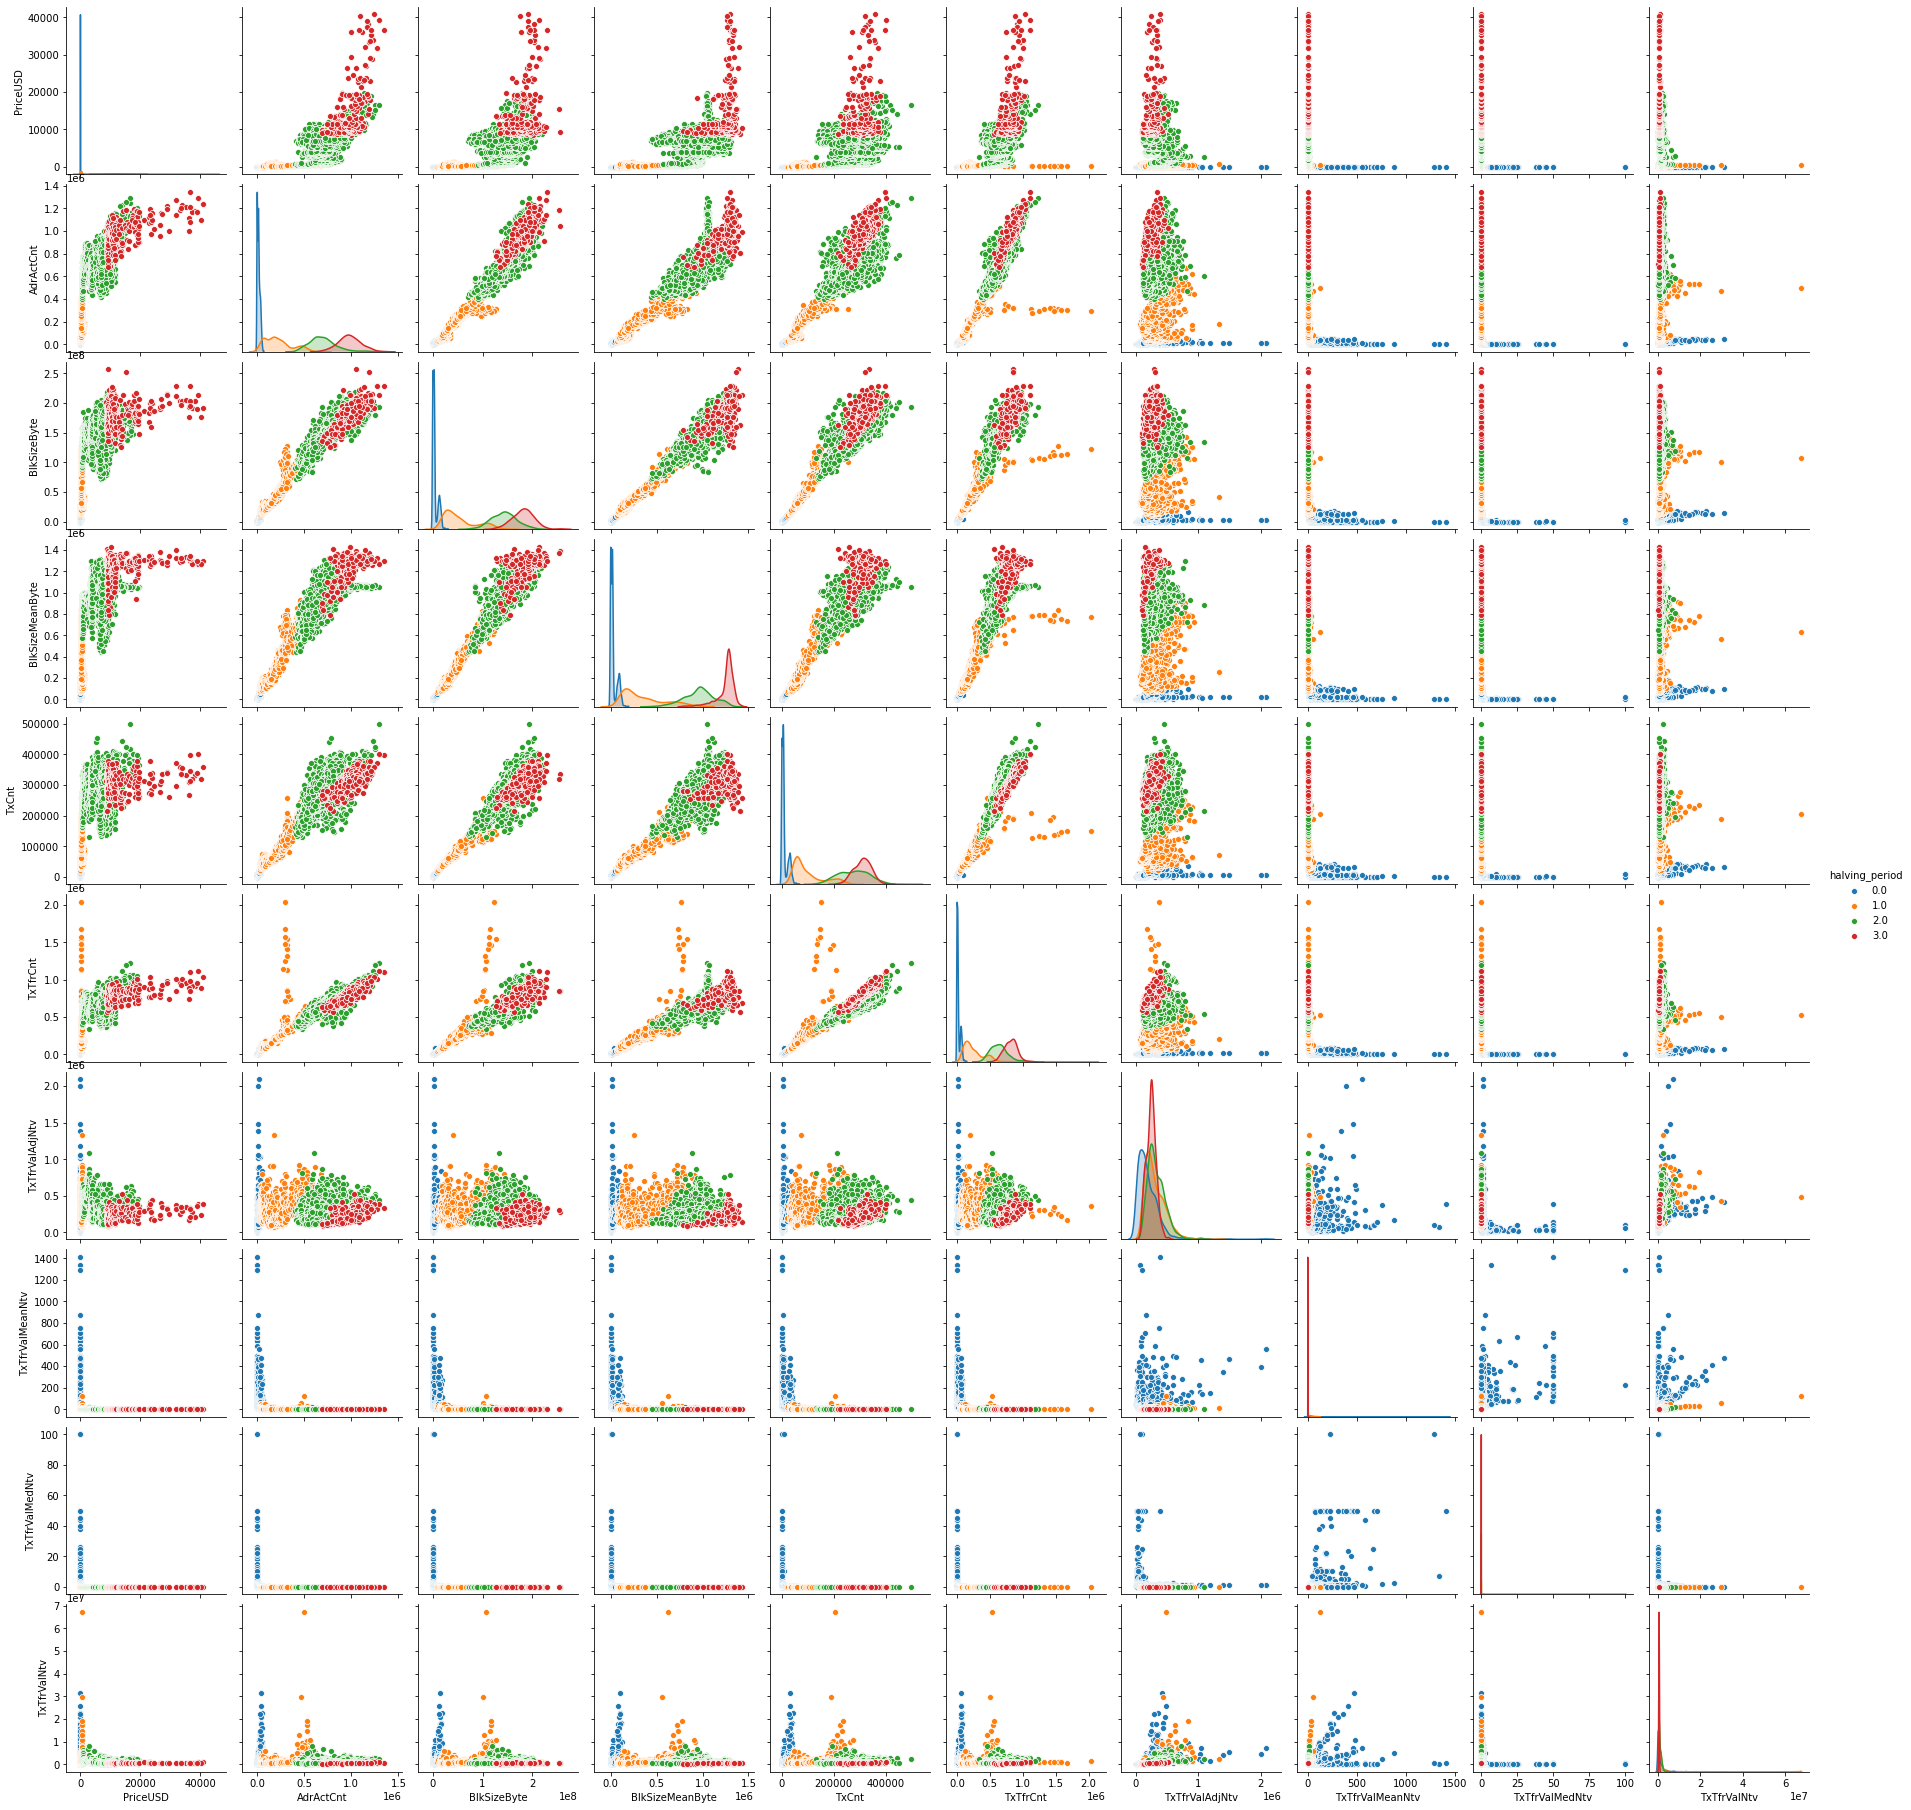

In [10]:
#to visualize correlation we construct some scatter plots.
#to better visualize all the pairs, we slice the daily dataframe by columns.

#First slice includes variables related to network usage, addresses and transactions.
first_slice_columns = ['PriceUSD', 'AdrActCnt', 'BlkSizeByte', 'BlkSizeMeanByte', 'TxCnt', 'TxTfrCnt', 'TxTfrValAdjNtv', 
                       'TxTfrValMeanNtv', 'TxTfrValMedNtv', 'TxTfrValNtv', 'halving_period']

usage_df = daily[first_slice_columns]

sns.pairplot(usage_df, hue='halving_period')
plt.show()

#The scatter plots suggest the price of bitcoin may be correlated with the number of active addresses (AdrActCnt)
#in the network, the block size in terms of bytes (BlkSizeByte), the average size of the block in bytes
#('BlkSizeMeanByte'), and the number of transactions in the network (TxCnt).
#The halving period seems to have a effect on the variables as datapoints appear to be clustered by halving period.

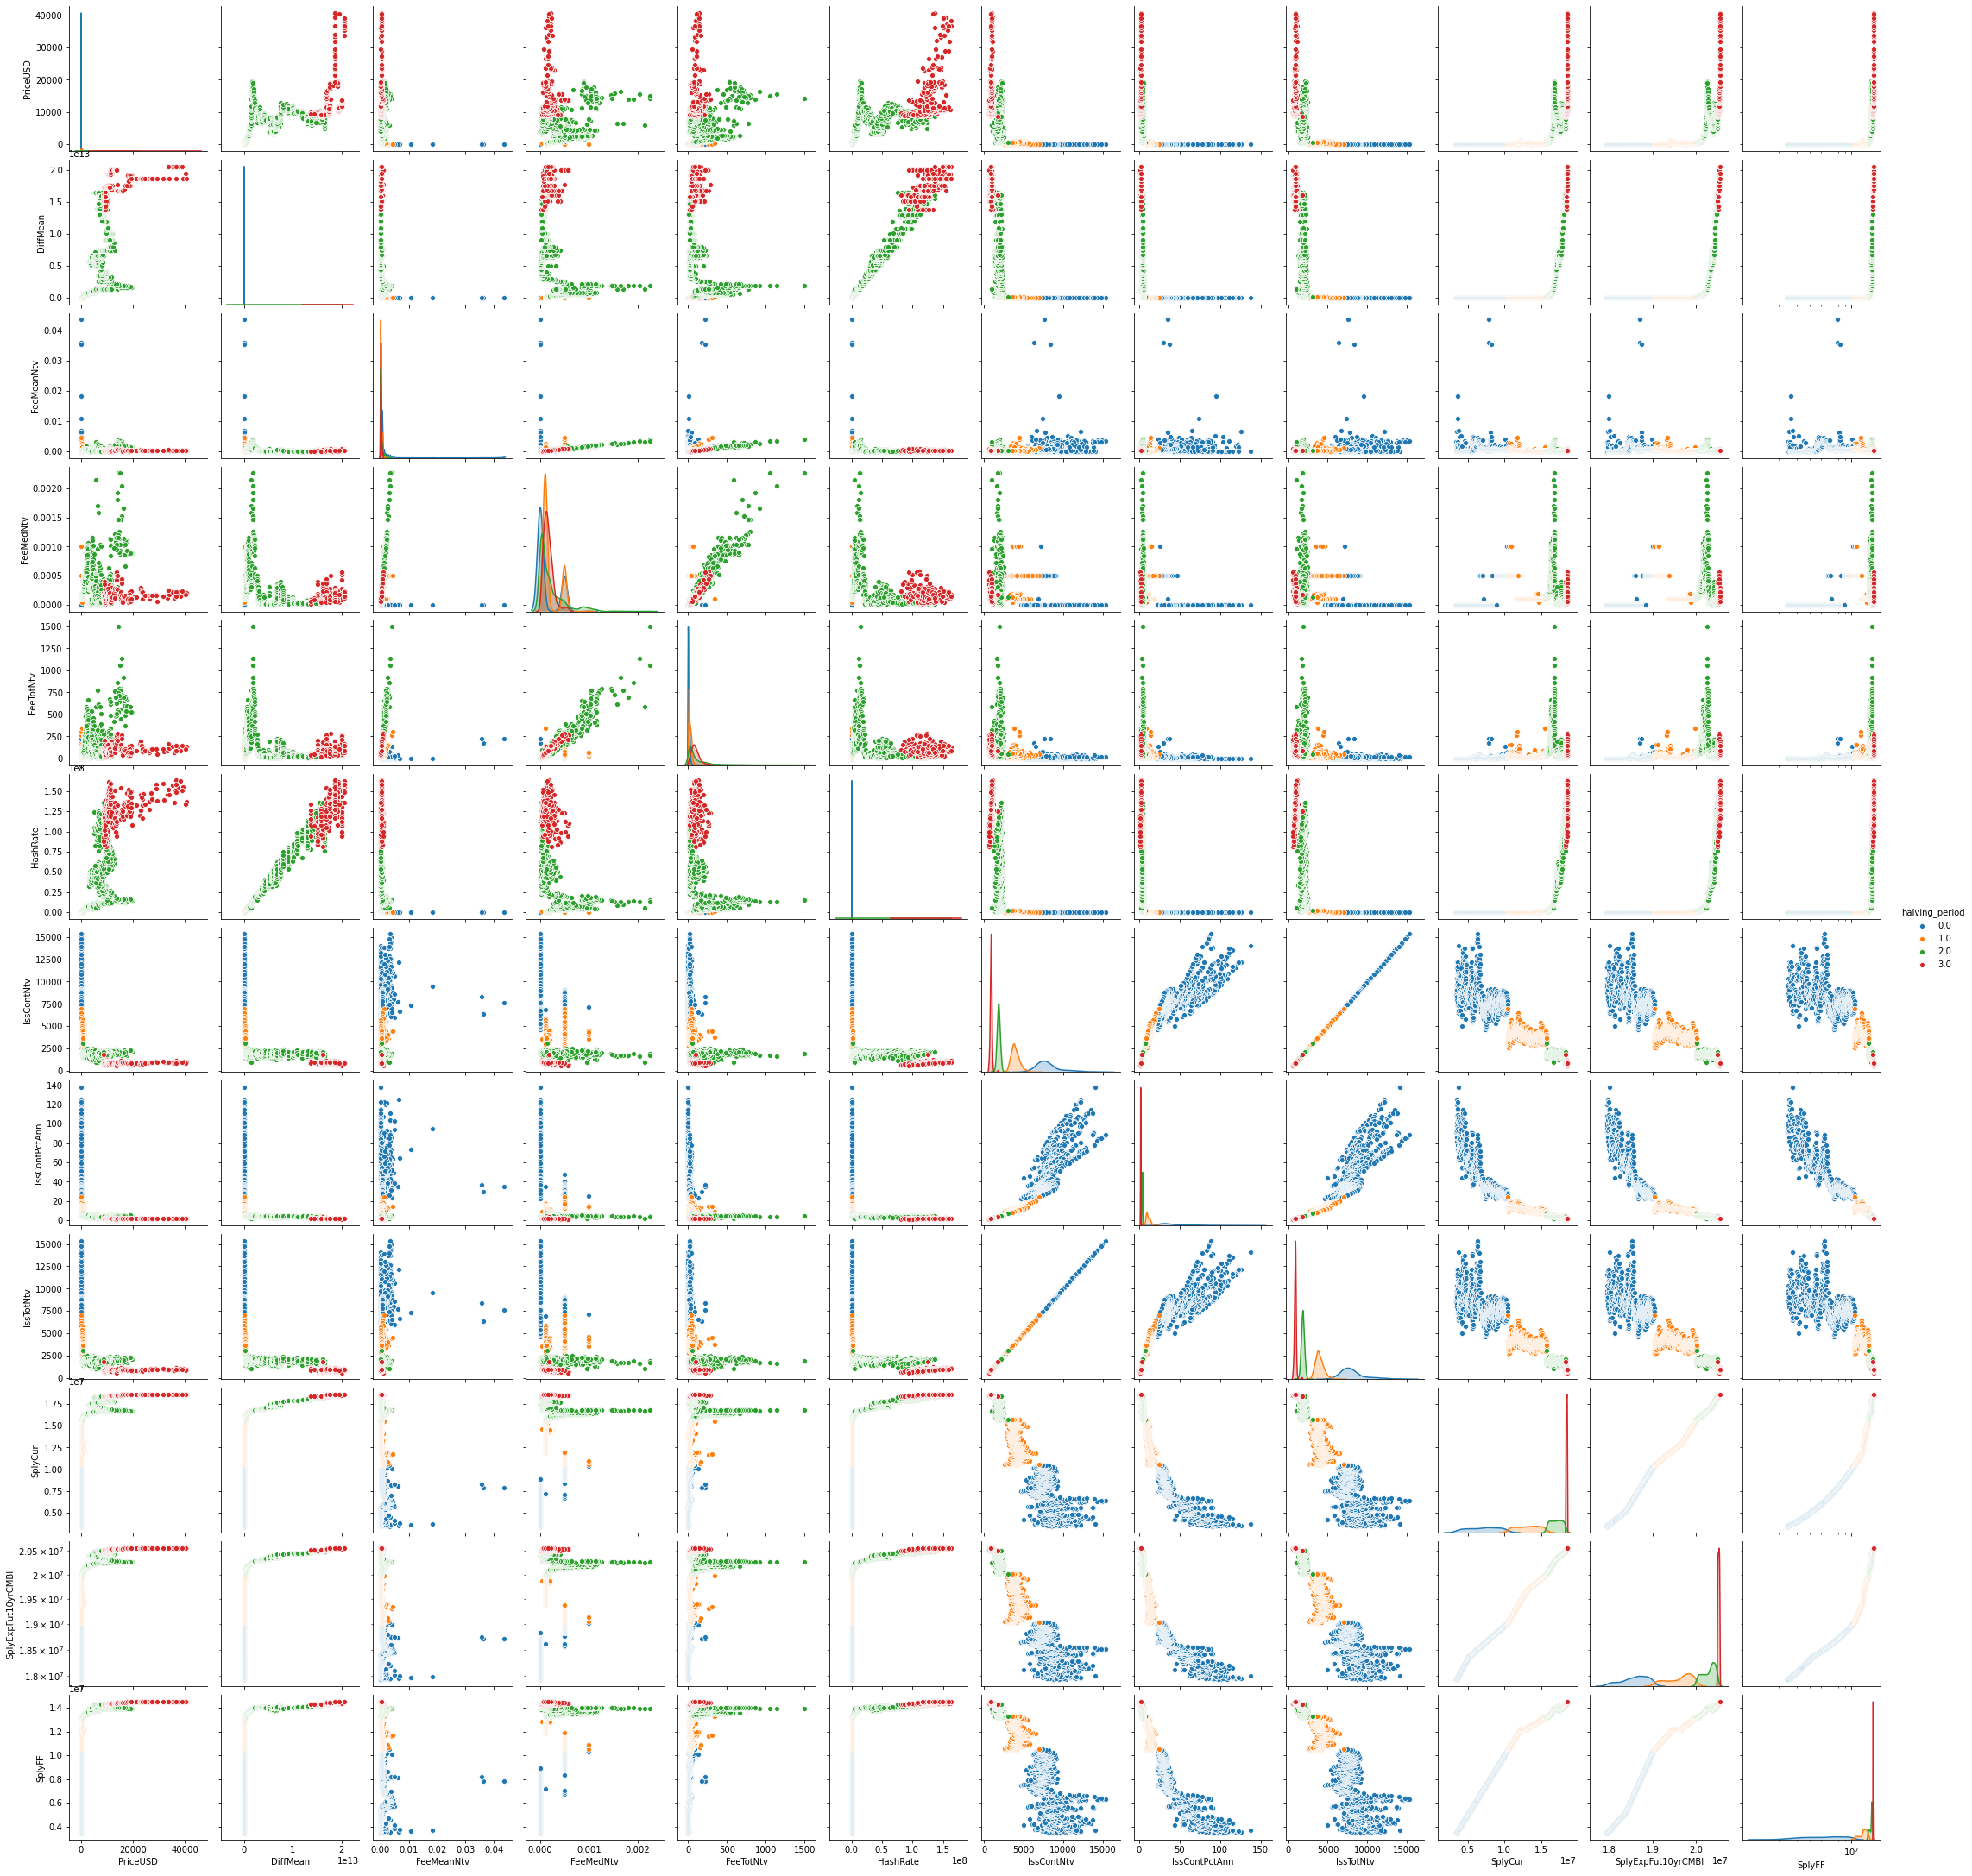

In [11]:
#Second slice includes variables related to bitcoin supply growth, fees and mining.
#halving period is used as the hue parameter to visualize the variables at different periods.
second_slice_columns = ['PriceUSD', 'DiffMean', 'FeeMeanNtv', 'FeeMedNtv', 'FeeTotNtv', 'HashRate', 'IssContNtv',
                        'IssContPctAnn', 'IssTotNtv', 'SplyCur', 'SplyExpFut10yrCMBI', 'SplyFF', 'halving_period']

supply_df = daily[second_slice_columns]

sns.pairplot(supply_df, hue='halving_period')
plt.yscale('log')
plt.xscale('log')
plt.show()

#The plots show that the variables most correlated with price are difficulty (DiffMean), HashRate 
#(amount of work being done by miners to secure the network), and the variables that have to do with the issuance
#of new bitcoins/supply growth (IssContNtv, IssContPctAnn, IssTotNtv).
#The halving period seems to have a effect on the variables as datapoints appear to be clustered by halving period.

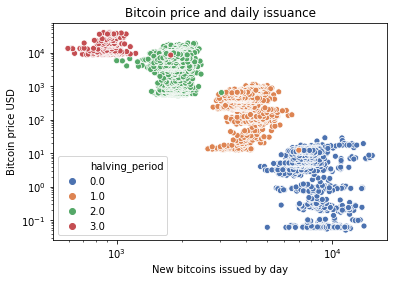

In [12]:
#To better visualize the relation between bitcoin supply growth and price, a scatter plot between price 
#and the daily issuance of new bitcoins is plotted
price_and_issuance = daily[['PriceUSD', 'IssTotNtv', 'halving_period']]
sns.scatterplot(x='IssTotNtv', y='PriceUSD', data=price_and_issuance, hue='halving_period', palette="deep")

plt.xlabel('New bitcoins issued by day')
plt.ylabel('Bitcoin price USD')
plt.title('Bitcoin price and daily issuance')
#plt.xlim(reversed(plt.xlim()))
plt.yscale('log')
plt.xscale('log')
plt.show()

#We see a correlation between the daily issuance of new bitcoins and the price, decreasing issuance and increasing
#price. Moreover, these datapoints appear to be clustered by halving period.

In [13]:
#Correlation matrix between prices and independent variables
corr_matrix = daily.corr()
price_correlation_matrix = corr_matrix.loc['PriceUSD'].sort_values(ascending=False)


'''
The matrix shows that the bitcoin price has the highest correlation with:
    - POSITIVE CORRELATION: hash rate (HashRate), average difficulty (DiffMean) and the number of addresses
        (AdrActCnt). Other variables related to network usage as number of transactions (Tx,TfrCnt, TxCnt) and
        block size (BlkSizeByte, BlkSizeMeanByte) also show a high correlation.
    NEGATIVE CORRELATION: Variables with high negative correlation with price are mostly related to
        issuance/supply growth of new bitcoins. As issuance decreases (slower growth of supply), price tends to 
        increase. These are IssTotNtv (total new bitcoins issued per day), IssContNtv and IssContPctAnn
        (annual growth of new bitcoin issued)
'''

price_correlation_matrix

PriceUSD              1.000000
HashRate              0.817262
DiffMean              0.810874
AdrActCnt             0.781318
block_height          0.735179
halving_period        0.719311
BlkSizeByte           0.715189
BlkSizeMeanByte       0.711331
TxTfrCnt              0.701270
TxCnt                 0.672106
SplyExpFut10yrCMBI    0.622987
SplyCur               0.613303
SplyFF                0.506740
FeeTotNtv             0.335636
FeeMedNtv             0.041348
TxTfrValAdjNtv        0.002744
FeeMeanNtv           -0.083136
TxTfrValMedNtv       -0.093473
TxTfrValNtv          -0.111527
TxTfrValMeanNtv      -0.187523
IssContPctAnn        -0.394782
IssContNtv           -0.554400
IssTotNtv            -0.554400
Name: PriceUSD, dtype: float64

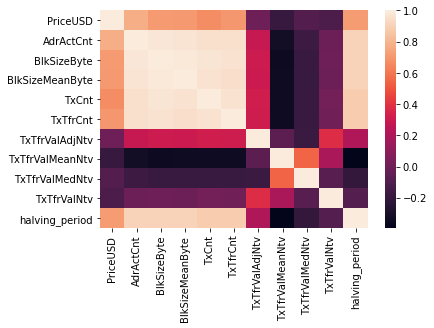

In [14]:
#heatmap of usage variables correlation matrix to visualize correlations.
sns.heatmap(usage_df.corr())
plt.show()

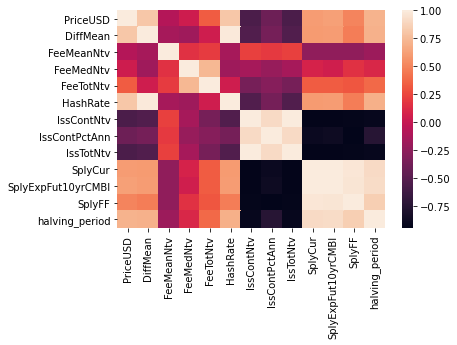

In [15]:
#heatmap of supply variables correlation matrix to visualize correlations.
sns.heatmap(supply_df.corr())
plt.show()

Conclusions.

We have identified the variables that have a higher correlation with the bitcoin price.
Some of these variables are in the network usage category: number of addresses(AdrActCnt),number of transactions (TxTfrCnt, TxCnt) and block size (BlkSizeByte, BlkSizeMeanByte).
Other variables are in the supply category: IssTotNtv (total new bitcoins issued per day), IssContNtv and IssContPctAnn (annual growth of new bitcoin issued).
Finnaly, variables related to bitcoin mining with high correlation are hash rate (HashRate) and average difficulty (DiffMean).

We have also identified that the price and these variables seem to cluster dependiing of the halving period we're in (halving_period variable).